#1. Introduction
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


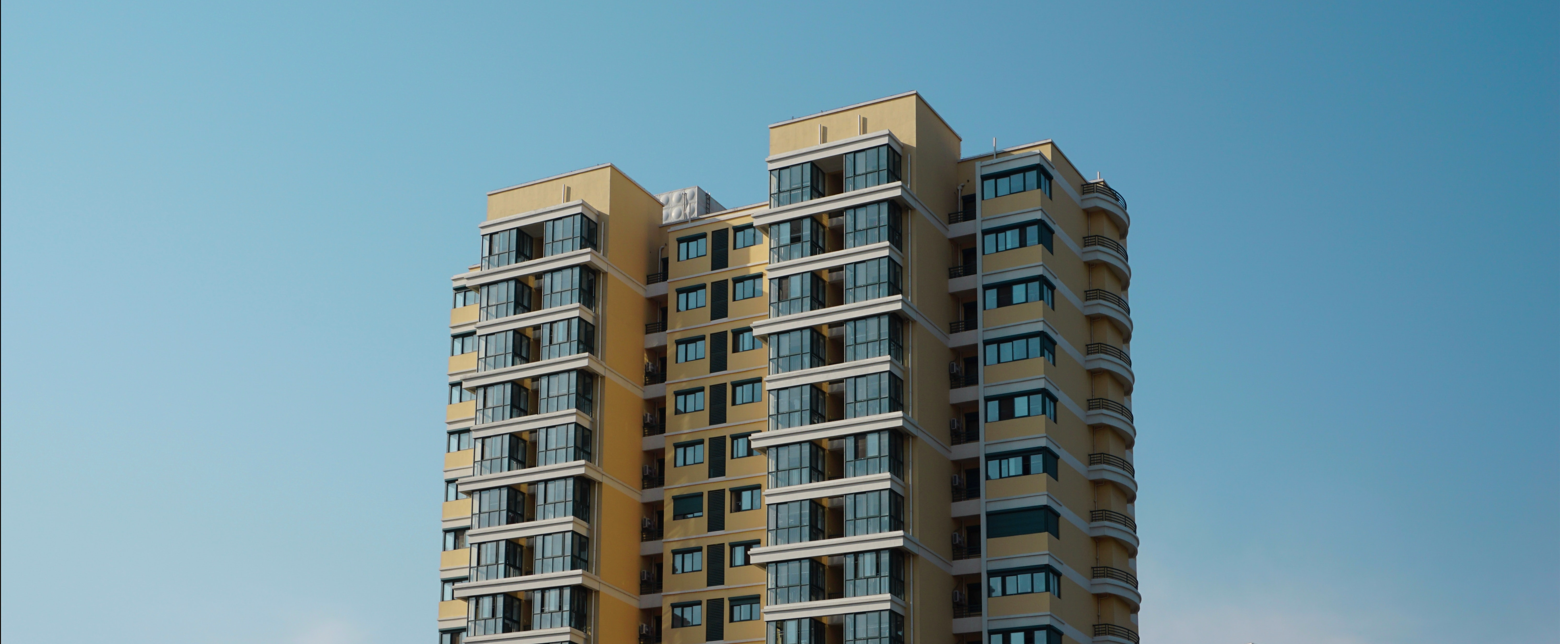

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#2. Data Loading


In [133]:
df = pd.read_csv('/content/train.csv')

In [134]:
# Dimension of the data
df.shape

(1460, 81)

## 2.1 Data Inspection

In [135]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [136]:
# Summary statistics of the numeric columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2.2 Null values

In [137]:
# Creating a DataFrame for Columns and their null values percentage
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null.rename(columns={'index':'Column'},inplace=True)
print(df_null.sort_values(by='% Null',ascending=False).head(10))
# Getting columns with high null values percentage
df_high_null = df_null[df_null['% Null']>25].sort_values(by='% Null')
# Columns in the above set will be dropped
cols_to_drop = df_high_null.Column.values
print('--'*15)
print(cols_to_drop )
df.drop(labels=cols_to_drop,axis=1,inplace=True)

          Column  % Null
72        PoolQC   99.52
74   MiscFeature   96.30
6          Alley   93.77
73         Fence   80.75
57   FireplaceQu   47.26
3    LotFrontage   17.74
59   GarageYrBlt    5.55
64    GarageCond    5.55
58    GarageType    5.55
60  GarageFinish    5.55
------------------------------
['FireplaceQu' 'Fence' 'Alley' 'MiscFeature' 'PoolQC']


In [138]:
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null[df_null['% Null']>0]

,index,% Null
3,LotFrontage,17.74
24,MasVnrType,0.55
25,MasVnrArea,0.55
29,BsmtQual,2.53
30,BsmtCond,2.53
31,BsmtExposure,2.60
32,BsmtFinType1,2.53
34,BsmtFinType2,2.60
41,Electrical,0.07
56,GarageType,5.55


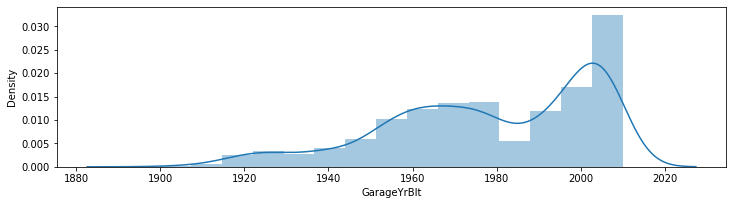

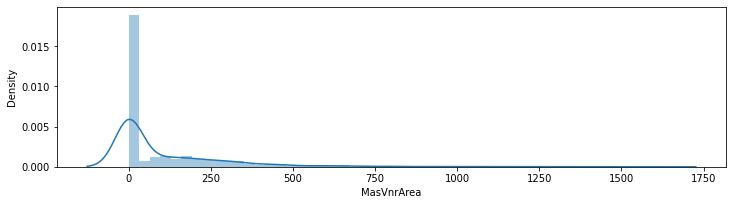

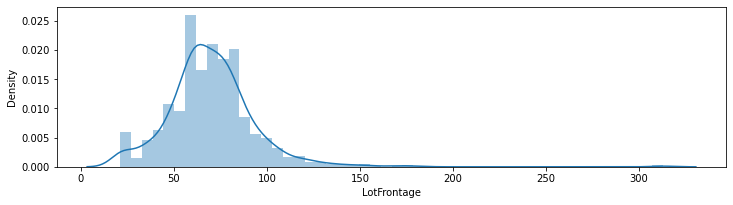

In [139]:
num_cols = ['GarageYrBlt','MasVnrArea','LotFrontage']
i=1
for col in num_cols:
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i)
  sns.distplot(df[col])
  i+=1
  plt.show()

In [140]:
df['LotFrontage'] = df['LotFrontage'].fillna(value=df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].median())

In [141]:
df.dropna(axis=0,inplace=True)

In [142]:
low_null = df_null[df_null['% Null']>0]['index'].tolist()

In [143]:
# Checking the categorical values in the Object columns
def check_value_counts(col_list):
  for col in col_list:
    print('-----------------------------')
    print(round((df[col].value_counts()/df.shape[0])*100,2))
    print('-----------------------------')

check_value_counts(low_null)

-----------------------------
69.0     19.06
60.0      8.97
80.0      5.01
70.0      4.71
75.0      3.74
         ...  
106.0     0.07
38.0      0.07
182.0     0.07
140.0     0.07
137.0     0.07
Name: LotFrontage, Length: 107, dtype: float64
-----------------------------
-----------------------------
None       57.03
BrkFace    32.29
Stone       9.57
BrkCmn      1.12
Name: MasVnrType, dtype: float64
-----------------------------
-----------------------------
0.0      56.80
108.0     0.60
180.0     0.60
72.0      0.60
16.0      0.52
         ...  
651.0     0.07
337.0     0.07
415.0     0.07
293.0     0.07
621.0     0.07
Name: MasVnrArea, Length: 325, dtype: float64
-----------------------------
-----------------------------
TA    44.39
Gd    44.25
Ex     8.97
Fa     2.39
Name: BsmtQual, dtype: float64
-----------------------------
-----------------------------
TA    92.45
Gd     4.63
Fa     2.84
Po     0.07
Name: BsmtCond, dtype: float64
-----------------------------
------------------

In [144]:
# Following columns have highly imbalanced data we can drop them
cols_to_drop = ['GarageCond','GarageQual','Electrical','BsmtFinType2','BsmtCond']
df.drop(labels=cols_to_drop,axis=1,inplace=True)

In [145]:
df['GarageFinish'] = df['GarageFinish'].fillna(pd.Series(np.random.choice(['Unf', 'RFn', 'Fin'], 
                                                      p=[0.45, 0.29, 0.26], size=len(df))))
df['GarageType'] = df['GarageType'].fillna(pd.Series(np.random.choice(['Attchd', 'Detchd'], 
                                                      p=[0.69, 0.31], size=len(df))))
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(value='NA')
df['BsmtExposure'] = df['BsmtExposure'].fillna(value='NA')
df['BsmtQual'] = df['BsmtQual'].fillna(value='NA')

##2.3 Data Standardisation

## 2.4 Feature Selection

In [146]:
# Checking the categorical values in the Object columns
def check_value_counts(col_list):
  for col in col_list:
    print('-----------------------------')
    print(round((df[col].value_counts()/df.shape[0])*100,2))
    print('-----------------------------')

check_value_counts(df.columns)

-----------------------------
1460    0.07
480     0.07
482     0.07
483     0.07
484     0.07
        ... 
973     0.07
975     0.07
976     0.07
979     0.07
1       0.07
Name: Id, Length: 1338, dtype: float64
-----------------------------
-----------------------------
20     37.52
60     21.97
50      9.64
120     6.43
160     4.56
80      4.26
70      4.26
30      3.81
90      2.09
190     1.57
85      1.42
75      1.05
45      0.67
180     0.45
40      0.30
Name: MSSubClass, dtype: float64
-----------------------------
-----------------------------
RL         79.67
RM         14.28
FV          4.63
RH          0.82
C (all)     0.60
Name: MSZoning, dtype: float64
-----------------------------
-----------------------------
69.0     19.06
60.0      8.97
80.0      5.01
70.0      4.71
75.0      3.74
         ...  
106.0     0.07
38.0      0.07
182.0     0.07
140.0     0.07
137.0     0.07
Name: LotFrontage, Length: 107, dtype: float64
-----------------------------
----------------------

In [147]:
obj_cols = df.select_dtypes(np.object).columns.tolist()
num_cols = df.select_dtypes([int, float]).columns.tolist()

In [148]:
len(obj_cols)

33

In [149]:
len(num_cols)

38

#3. EDA

##3.1 Univariate Analysis

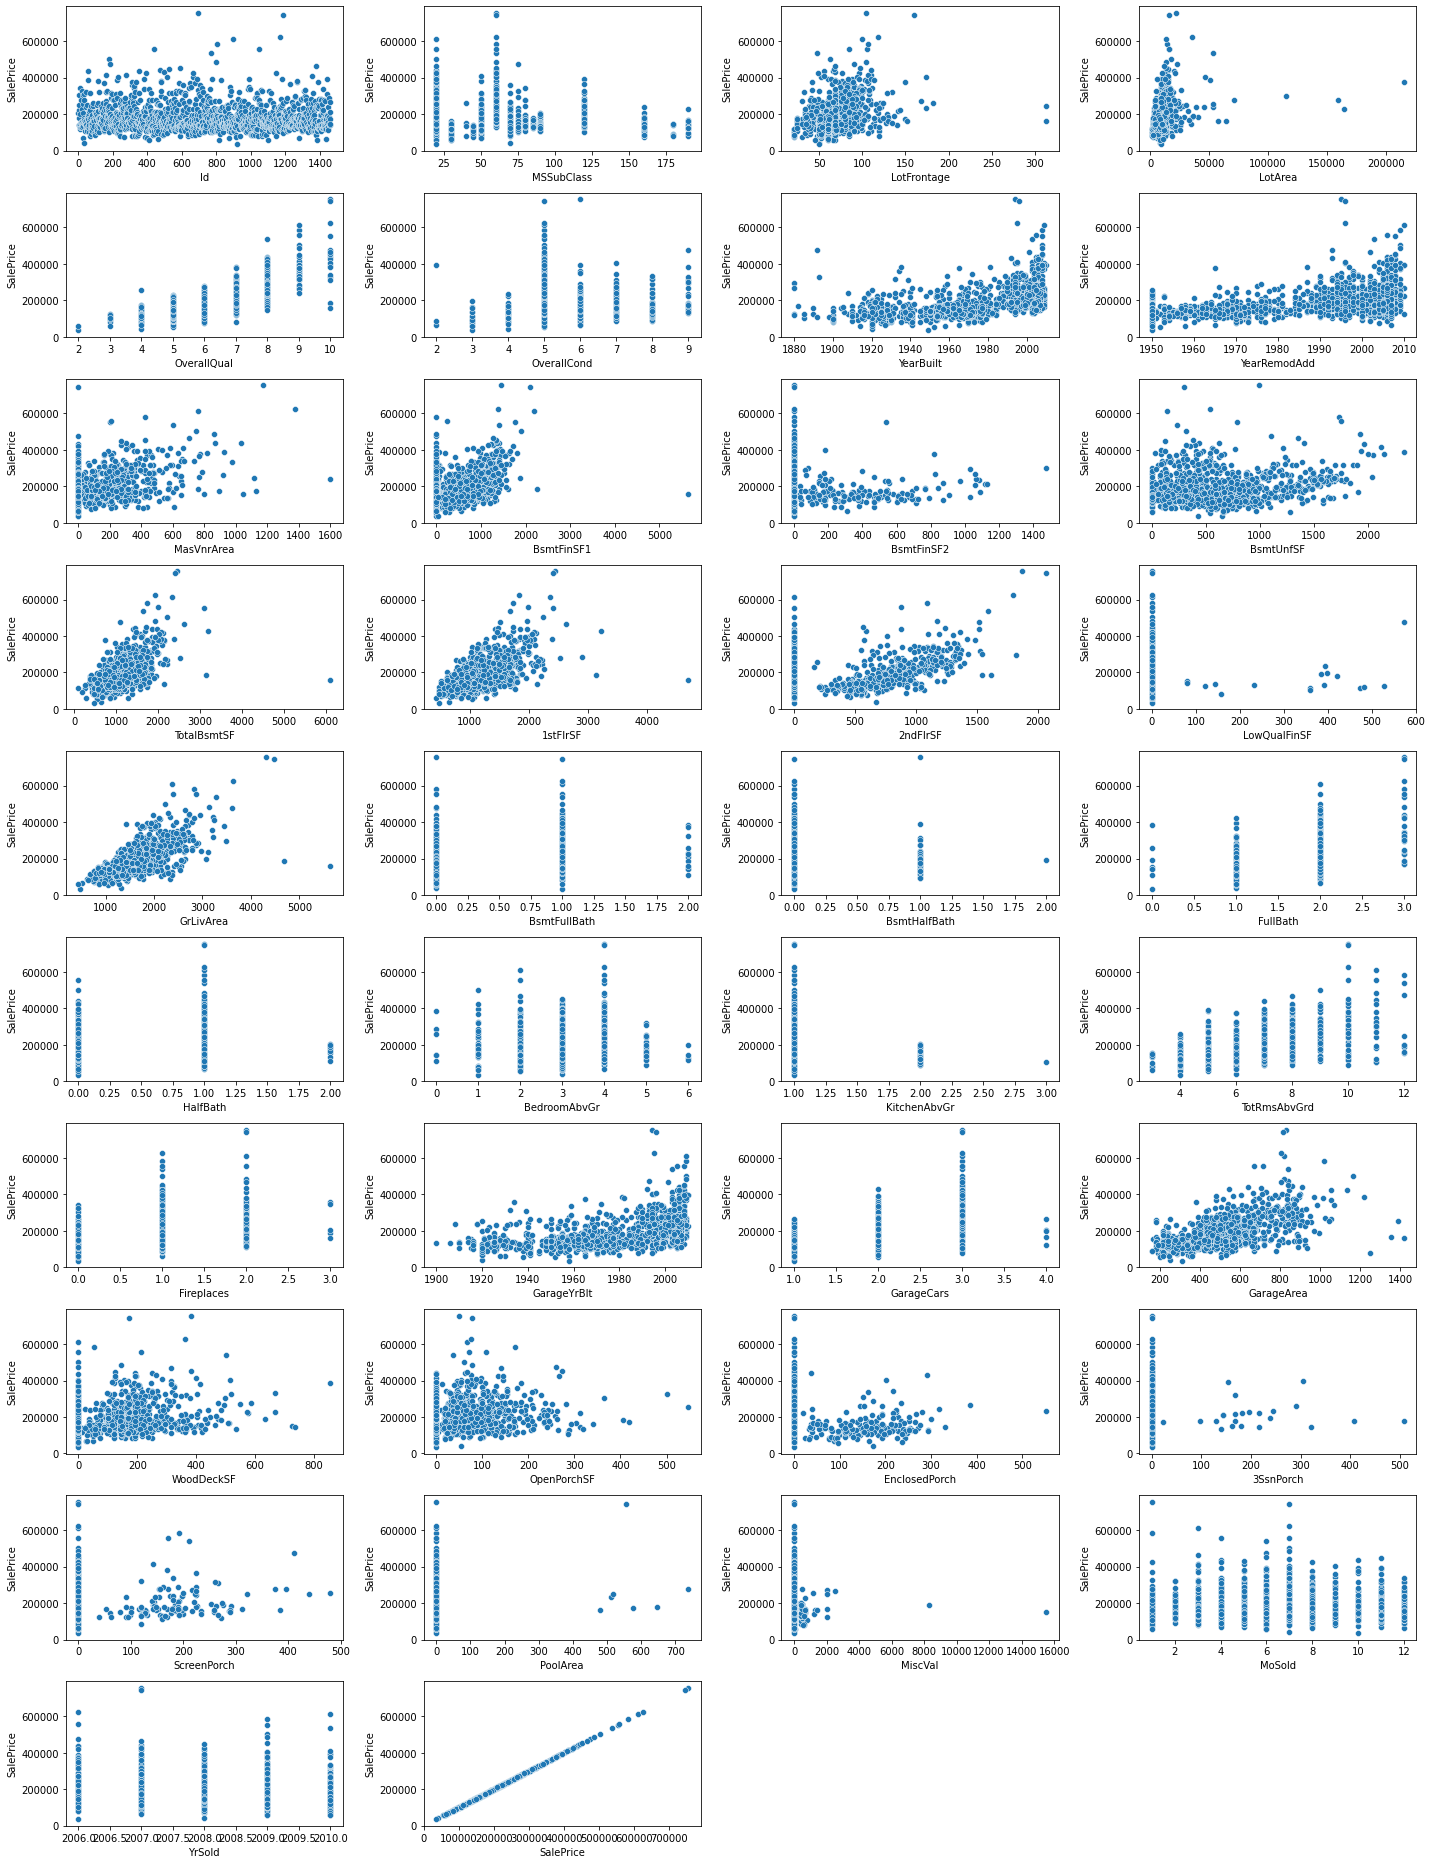

In [150]:
plt.figure(figsize=(20,26))
i=1
for col in num_cols:
  plt.subplot(10,4,i)
  sns.scatterplot(x=df[col],y=df['SalePrice'])
  i+=1
  plt.tight_layout()

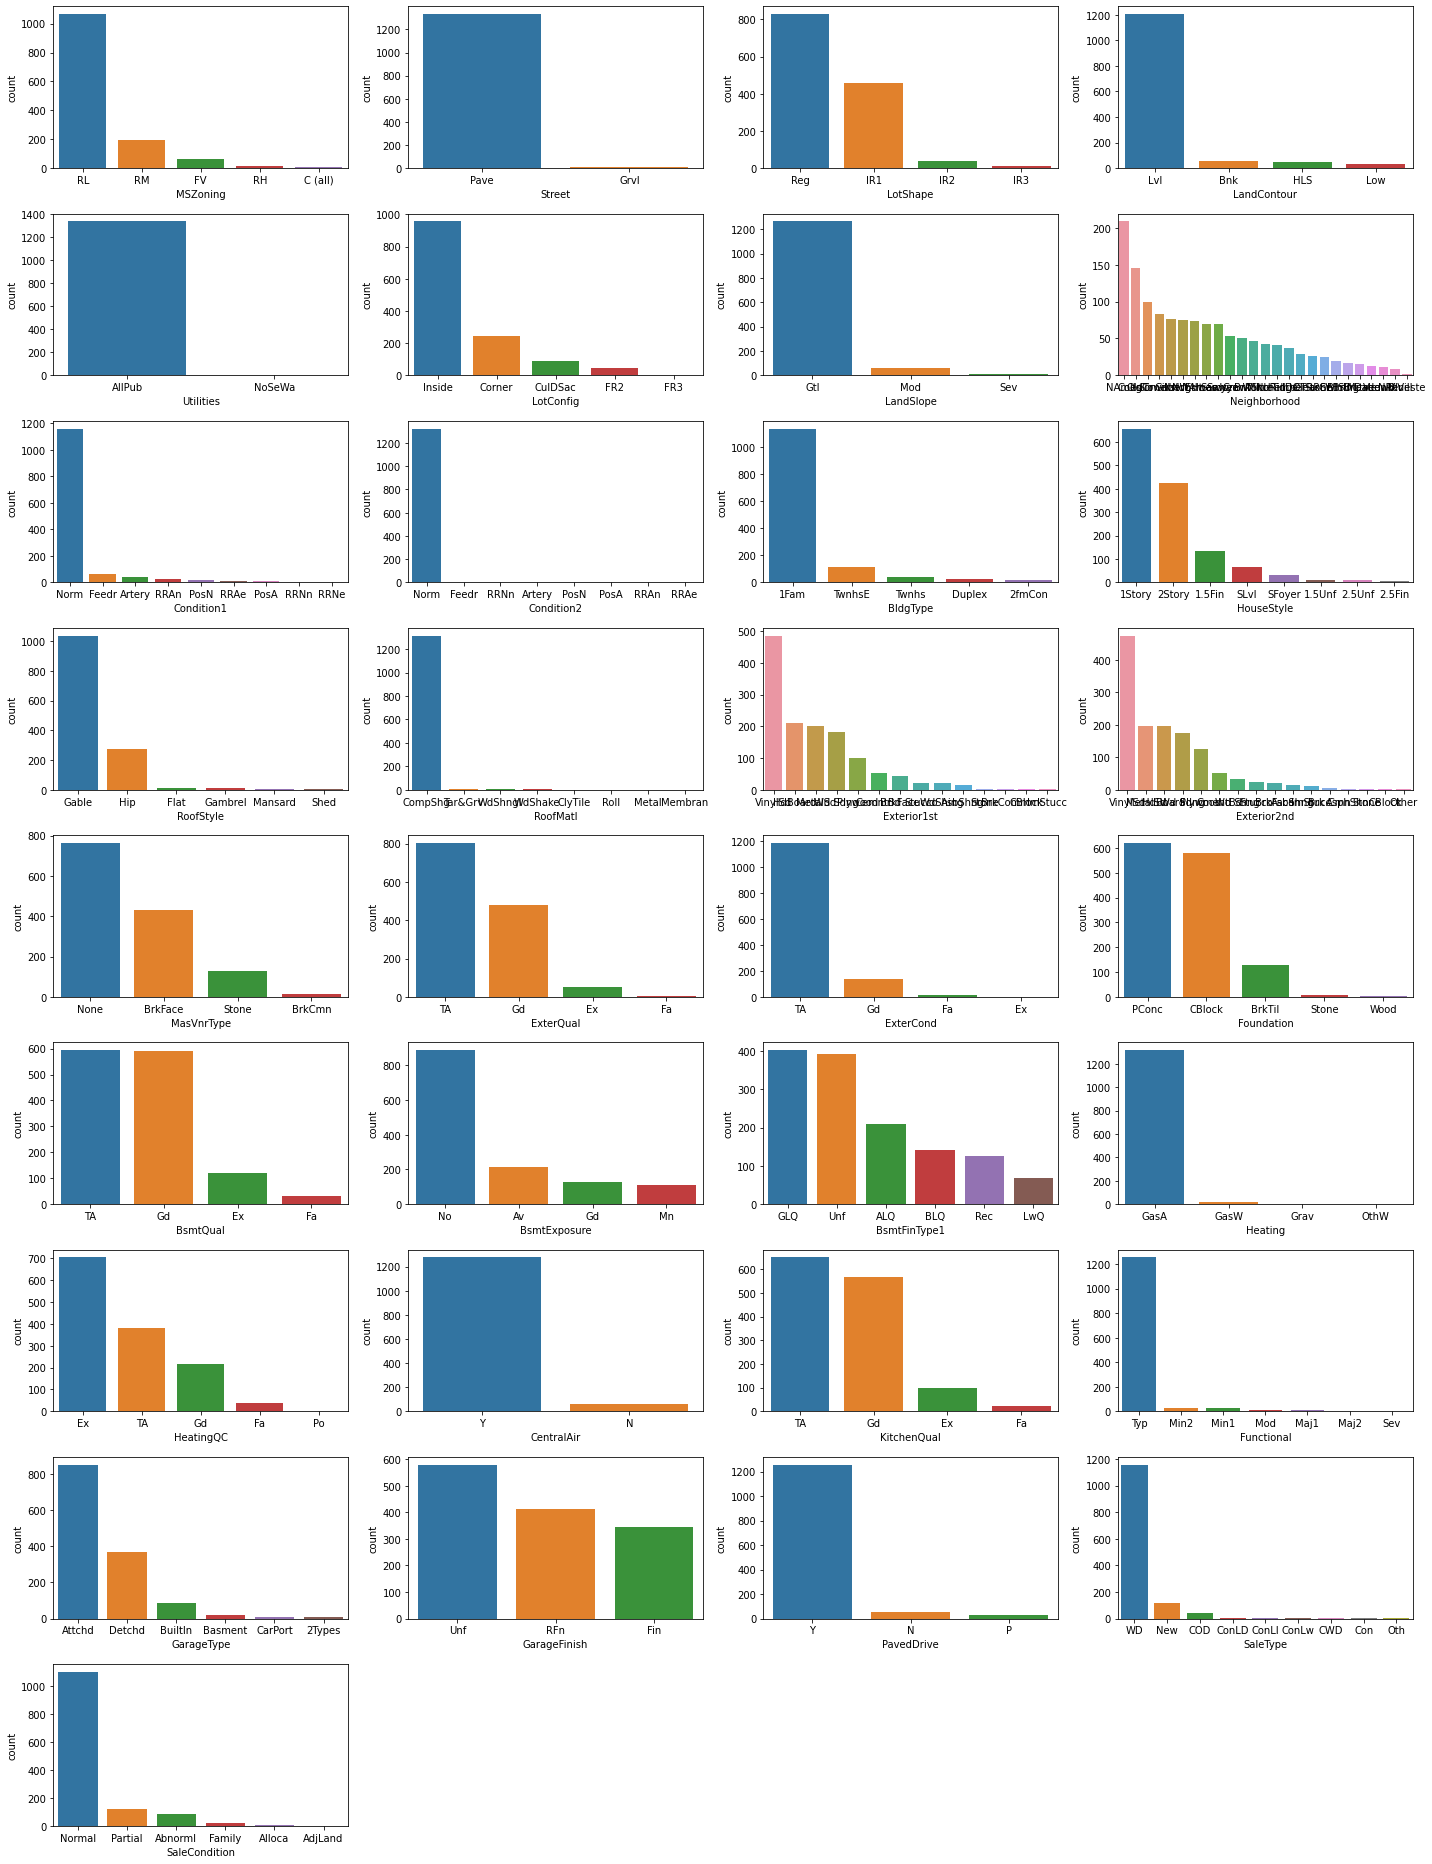

In [151]:
plt.figure(figsize=(20,26))
i=1
for col in obj_cols:
  plt.subplot(9,4,i)
  sns.countplot(data = df, x=col,order=df[col].value_counts().index)
  i+=1
  plt.tight_layout()

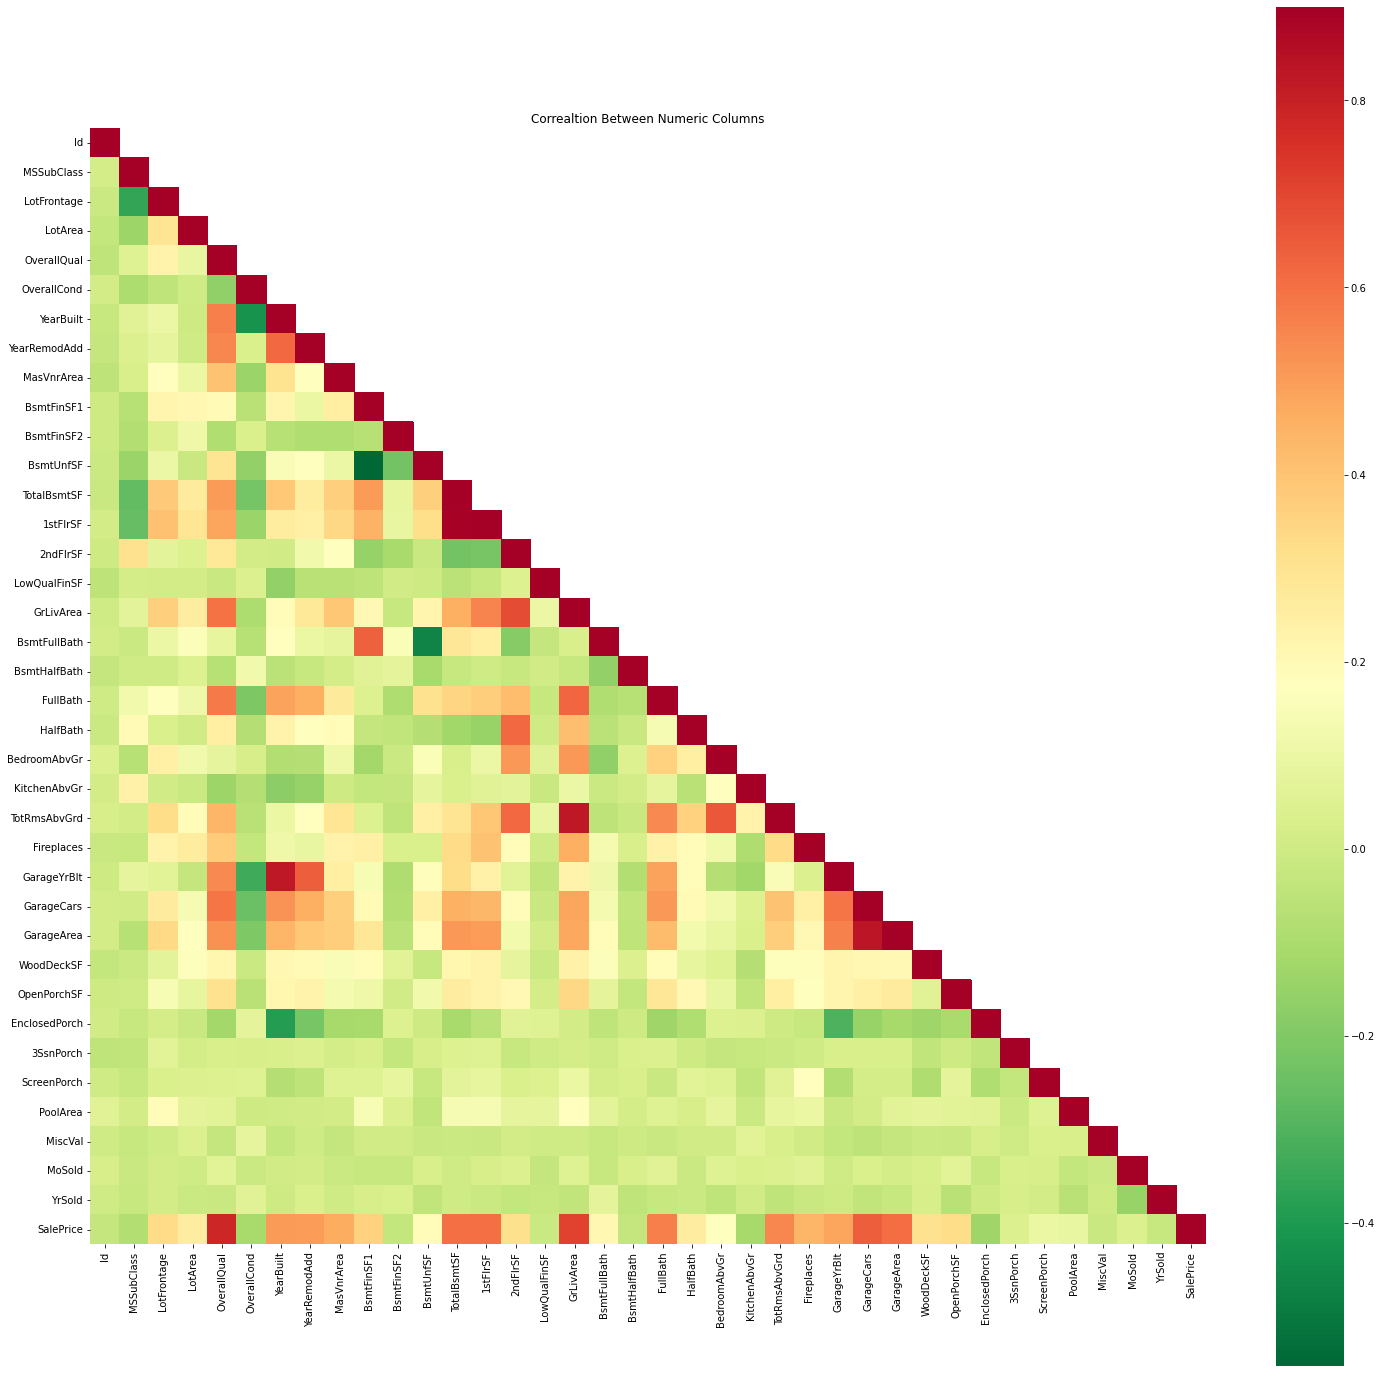

In [152]:
# Firstly, creating the correlation matrix
corr_mat = df.corr()
corr_mat_mask = np.array(corr_mat)
# Creating a heatmap
corr_mat_mask[np.tril_indices_from(corr_mat)] = False
plt.figure(figsize=[25,25])
sns.heatmap(corr_mat, mask=corr_mat_mask, vmax=.9, square=True, cmap='RdYlGn_r').set(title='Correaltion Between Numeric Columns');
plt.show()

- MSSubClass - 20(1-STORY 1946 & NEWER ALL STYLES) is the largerst occupancy and 60(is the second largest) count in the dataset
- MSZoning - Most Houses sold are in Residential Low Density creating bias towards such data
- Street - Most values is Pave making the column irrelevant for any further anlysis. We will drop it
- LotShape - Regular and Slighly Irregular occupy most of the data
- LandContour - Almost all of the values are Lvl making this field skewed towards the values
- Utilities - All the houses have all public utitlies hence we can drop the columns
- LotConfig - Most lots are inside lot which make sense since not all houses can be corner house or similar
- LandSlope - This indicates most of lands have gentle sope we can check the significance of the variable while model building
- Neighborhood- Neighbourhood is highly diverse which might give us good informatin while predicting the sale price
- Condition1 - Mosthouses are normal and very few any diversity in conditions making data highy skewed
- Condition2 - Almost all the houses do not have seconds condition since Conition1 has very low count on values other than normal
- BldgType - Most houses are Single-family Detached, However this might give us more information despite being skweed so we wont be dropping it
- HouseStyle - Most houses are 1story,2Story
- RoofStyle - Most houses have either gable or hip roof
- RoofMatl - Roof Matrial is extremely biased towards CompShg which makes it unsuitable to detect variance in data
- ExterCond - Most of the houses have Average exterior
- BsmtCond - Most of the houses have Average Bsmnt Cond
- BsmtExposure - Most of the basesment have no exposure but there are values which are significant in other cases
- BsmtFinType2 - Is biased towards Unf(Unfinihed)
- Heating - Is mostly GasA other values are non significant
- CentralAir - Yes or No Most of houses are Central Air Conditioned
- Electrical - SBrkr is the most common in Electrical
- Functional - which describe functionality of the house Typical/ Average is the most common
- GarageQual - Typical and average is the most common
- GarageCond - Typical and average is the most common
- PavedDrive - Most drives are Paved
- MiscFeature - Most houses have shed
- SaleType - Most houses are sold undes conventional sales deed type
- SaleCondition - Most sales are normal however we can see what else affects the sale price
- Exterior1st, Exterior2nd, MasVnrType, ExterQual, Foundation, OverallQual, OverallCond, BsmtQual, BsmtFinType1, HeatingQC, KitchenQual, FireplaceQu, GarageType, GarageFinish,PoolQC,Fence - have a normal dstribution



In [153]:
#Calculating the age of property
df['age_prop'] = df['YrSold'] - df['YearBuilt']

In [154]:
#Dropping the columns with skewed data or with low variance
drop_cols = ['Id','Street','Utilities','Condition2','RoofMatl','Heating','Functional',
             'YrSold','YearBuilt','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' ,'LandSlope', 'LandContour', 'CentralAir', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'PavedDrive', 'SaleType', 'SaleCondition']
df.drop(drop_cols, axis=1, inplace=True)

In [155]:
categorical_features = list(df.select_dtypes(include='object').columns)

In [156]:
#Creating dummies and dropping the columns used in creating dummies
train_df = pd.concat([df,pd.get_dummies(df[categorical_features],drop_first=True)],axis=1).drop(categorical_features,axis=1)

In [174]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,age_prop,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,0,2,208500,5,0,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,0,5,181500,31,0,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2002,162.0,486,0,434,920,920,866,1786,1,2,1,3,6,1,2001.0,2,608,0,42,0,9,223500,7,0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1970,0.0,216,0,540,756,961,756,1717,1,1,0,3,7,1,1998.0,3,642,0,35,272,2,140000,91,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,60,84.0,14260,8,5,2000,350.0,655,0,490,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,3,836,192,84,0,12,250000,8,0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [173]:
train_df.shape

(1338, 154)

#4. Train-Test Split

In [157]:
from sklearn.model_selection import train_test_split

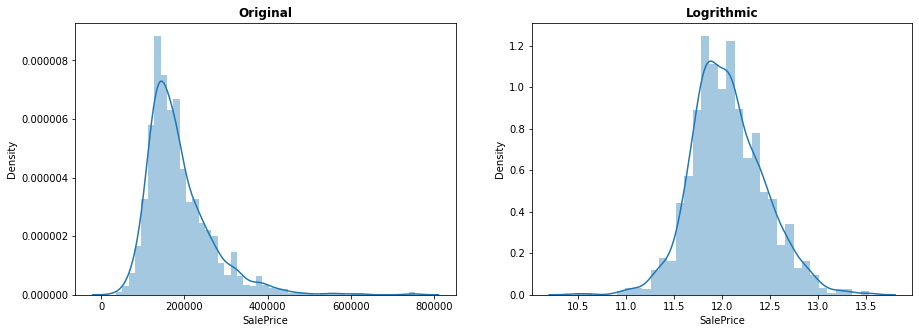

In [175]:
# Target variable data analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['SalePrice']).ticklabel_format(useOffset=False, style='plain')
plt.title("Original", weight='bold')

plt.subplot(1, 2, 2)
sns.distplot(np.log(df['SalePrice']))
plt.title("Logrithmic", weight='bold')

plt.show()

In [158]:
housing_df['SalePrice'] =  np.log1p(housing_df['SalePrice'])

X = housing_df.drop('SalePrice',axis=1)
y = housing_df['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.70,random_state=42)

#5. Feature Scaling

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

#6. Modelling

##6.1 Linear Regression

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [162]:
LR = LinearRegression().fit(X_train,y_train)

In [163]:
y_pred = LR.predict(X_test)

In [164]:
print(f'Test  Score: {r2_score(y_pred,y_test)}')

Test  Score: -0.004499591132665959


In [165]:
print(f'Train Score: {LR.score(X_train,y_train)}')
print(f'Test  Score: {LR.score(X_test,y_test)}')

Train Score: 0.9503657471265683
Test  Score: -6.804325443117698e+19


In [166]:
mse = cross_val_score(LinearRegression(),X_train,y_train,scoring='neg_mean_squared_error',cv=10)
mean_mse = np.mean(mse)
print(mean_mse)

-5.04465709800994e+20


##6.2 Ridge Regression

In [167]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [168]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0.1,1,5,10,20,30,40,45,50,55,100,1000]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 45, 50, 55, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [169]:
print(ridge_regressor.best_score_)
print(ridge_regressor.best_params_)

-7.533747376846092e-05
{'alpha': 100}


In [179]:
y_pred_ridge_train=ridge_regressor.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_ridge_train),2))

y_pred_ridge_test=ridge_regressor.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_ridge_test),2))

Train R2 Square :  0.94
Test R2 Square :  0.66


##6.3 LASSO Regression

In [170]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [171]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0.1,1,5,10,20,30,40,45,50,55,100,1000]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 45, 50, 55, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [172]:
print(lasso_regressor.best_score_)
print(lasso_regressor.best_params_)

-7.845754275078061e-05
{'alpha': 1e-08}


In [177]:
y_pred_lasso_train=lasso_regressor.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_lasso_train),2))

y_pred_lasso_test=lasso_regressor.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_lasso_test),2))

Train R2 Square :  0.95
Test R2 Square :  0.66
